# **👑DATA SCHOOL PROJECT06**  
**┗ 코호트 분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* Process 01
* Process 02
* Process 03
* Lesson Learned

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 코호트 분석
```  

> **프로젝트유형**

```
▶ 이커머스 데이터 활용 코호트 분석

```

> **학습목표**

```
▶ 코호트 분석의 원리와 방법론에 대한 깊은 이해 습득
▶ 이커머스 데이터의 특성을 파악하고, 고객의 재구매, 이탈 등의 패턴을 분석하는 능력 개발
▶ 다양한 기간과 세그먼트에 따른 고객 행동의 변화를 시각적으로 표현하는 능력 향상
▶ 코호트 분석 결과를 바탕으로 마케팅 및 영업 전략을 제안할 수 있는 능력 개발
```

> **예상 결과물**

```
▶ 각 코호트별 재구매, 이탈률 등의 지표 분석 보고서
▶ 시간에 따른 고객 행동 변화를 나타내는 시각화 자료 (히트맵, 그래프 등)
▶ 주요 코호트의 특징 및 추세 파악에 대한 문서화
▶ 분석 결과를 기반으로 한 마케팅 및 영업 전략 제안서
```


## **문제상황 Introduction**
---
> **시나리오**

```
기업 Zeta는 자사의 이커머스 사이트에서의 고객 행동 패턴을 더 잘 이해하고자 한다. 최근, 고객들의 재구매율이 떨어지는 경향을 보이며, 이에 대한 원인과
대응 방안을 찾고자 한다. 마케팅 팀은 고객의 재구매 및 이탈 패턴을 분석하기 위해 "코호트 분석" 프로젝트를 시작하기로 결정한다.
마케팅팀은 고객들의 최초 구매 월을 기준으로 코호트를 형성한다. 예를 들어, 1월에 처음 구매한 고객들, 2월에 처음 구매한 고객들 등으로 그룹을 나눈다.
이러한 코호트 그룹별로 이후의 월별 재구매율, 이탈률 등의 지표를 분석한다. 이 때, CohortIndex라는 지표를 활용하여 각 코호트가 유입된 이후로 지난
개월 수를 표시한다. 예를 들어, 1월에 처음 구매한 고객 그룹의 3월 재구매율을 보고자 할 때, CohortIndex는 '3'이 된다.
프로젝트 진행 중, 마케팅팀은 특정 코호트에서 재구매율이 높게 나타나는 패턴과 이탈률이 높게 나타나는
패턴을 발견한다. 이러한 분석을 통해, 그 원인이 무엇인지, 어떤 마케팅 전략이나 프로모션 활동이 효과적이었는지 파악하고자 한다.
```  

> **문제정의**

```
▶ 고객들의 재구매율 저하로 인한 매출 감소
```  

> **기대효과**

```
▶ 고객 이탈 원인 파악을 통해 마케팅 전략 수정
▶ 효과적인 마케팅 유형 파악 및 적용으로 고객 재구매율 증가
```

> **해결방안**

```
▶ 코호트 분석을 이용한 월별 재구매율/이탈률 분석으로 재구매율 감소 원인 파악
```

> **성과측정**  

```
▶ 관리 전/후 고객 그룹 재구매율/이탈률 모니터링
```

> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|InvoiceNo|송장번호|
|StockCode|재고코드|
|Description|상세설명|
|Quantity|수량|
|InvoiceDate|송장날짜|
|UnitPrice|개당가격|
|CustomerID|고객ID|
|Country|나라|


In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/zerobase/05.DataSchool/02.Personal_PJT/P_PJT06')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/zerobase/05.DataSchool/02.Personal_PJT/P_PJT06'

In [124]:
# ▶ Data read
import pandas as pd
import numpy as np

df = pd.read_csv('P_PJT06_DATA.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **Process01**
**Data 전처리**
---

In [125]:
df.shape

(541909, 8)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [127]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [128]:
df[(df.Quantity <0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [129]:
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


quantity 음수값은 환불 경우를 나타내는 것 같다. 

UnitPrice가 음수인 데이터는 아무래도 이상치 데이터인듯하며, CustomerID가 nan값이다. 이따가 CustomerID 결측값 처리할때 한번에 처리하자. 

In [130]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

CustomerID가 결측값을 나타내는 데이터로는 고객 그룹의 특성을 찾아낼 수 없기때문에 해당 필드들은 삭제한다. 

In [131]:
df.dropna(subset='CustomerID',inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [132]:
df.shape

(406829, 8)

54만개 -> 40만개로 데이터 수가 줄었다. 

> 날짜 데이터 변환

In [133]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [134]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

2020.12월부터 2011년 11월까지의 데이터를 다루는 것이 좋을 것 같다. 왜냐하면 2011년 12월의 데이터는 9일까지밖에 없어 불완전하기 때문이다. 

따라서 2011년 12월의 데이터를 모두 지운다. 

In [135]:
from datetime import datetime

df = df[(df.InvoiceDate.dt.strftime("%Y-%m") != '2011-12')]
df.InvoiceDate.max()

Timestamp('2011-11-30 17:42:00')

## **Process 02**
**데이터 EDA 수행**
---

### 총 주문수, 거래액, 등 알아보기
---

> 총 주문수, 전체 거래금액, 총 구매수량, 전체 고객수. 건당 구매금액, 건당 구매수량

In [136]:
df['TotalPrice'] = df.UnitPrice * df.Quantity

total_orders = len(df.InvoiceNo.unique())
total_value = df.TotalPrice.sum()
total_quantity = df.Quantity.sum()
total_people = len(df.CustomerID.unique())
avg_value_orders =round(total_value / total_orders,3)
avg_value_people = round(total_value / total_people, 3)
avg_quantity_orders = round(total_quantity / total_orders, 2)
avg_value_quantity = round(total_value / total_quantity, 3)

print("전체 주문수: ", total_orders,
      "\n전체 거래금액: ", total_value,
      "\n총 구매수량: ", total_quantity,
      "\n전체 고객 수: ", total_people,
      "\n거래건당 구매금액: ", avg_value_orders,
      "\n고객당 구매금액: ", avg_value_people,
      "\n거래건당 구매수량: ", avg_quantity_orders,
      "\n물품 개당 평균금액: ", avg_value_quantity)

전체 주문수:  21269 
전체 거래금액:  7957559.434 
총 구매수량:  4703052 
전체 고객 수:  4331 
거래건당 구매금액:  374.139 
고객당 구매금액:  1837.349 
거래건당 구매수량:  221.12 
물품 개당 평균금액:  1.692


### 월별 이용고객수, 거래금액, 구매수량 알아보기
---

In [137]:
df['Date'] = df.InvoiceDate.dt.strftime("%Y-%m")

In [138]:
df_date = df.groupby('Date').agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','TotalPrice':'sum'}).reset_index()
df_date.columns = ['Date', '이용건수','이용고객수','수량','금액']
df_date['이용건당 주문금액'] = round(df_date.iloc[:,4] / df_date.iloc[:,1],3)
df_date['고객당 주문금액'] = round(df_date.iloc[:,4] / df_date.iloc[:,2],3)
df_date['물품 개당 평균금액'] = round(df_date.iloc[:,4] / df_date.iloc[:,3],3)
df_date


,Date,이용건수,이용고객수,수량,금액,이용건당 주문금액,고객당 주문금액,물품 개당 평균금액
0,2010-12,1708,948,296362,554604.020,324.710,585.025,1.871
1,2011-01,1236,783,269379,475074.380,384.364,606.736,1.764
2,2011-02,1202,798,262833,436546.150,363.183,547.050,1.661
3,2011-03,1619,1020,344012,579964.610,358.224,568.593,1.686
4,2011-04,1384,899,278585,426047.851,307.838,473.913,1.529
5,2011-05,1849,1079,367852,648251.080,350.596,600.789,1.762
6,2011-06,1707,1051,356922,608013.160,356.188,578.509,1.703
7,2011-07,1593,993,363418,574238.481,360.476,578.286,1.580
8,2011-08,1544,980,386612,616368.000,399.202,628.947,1.594
9,2011-09,2078,1302,537496,931440.372,448.239,715.392,1.733


<Figure size 1300x600 with 0 Axes>

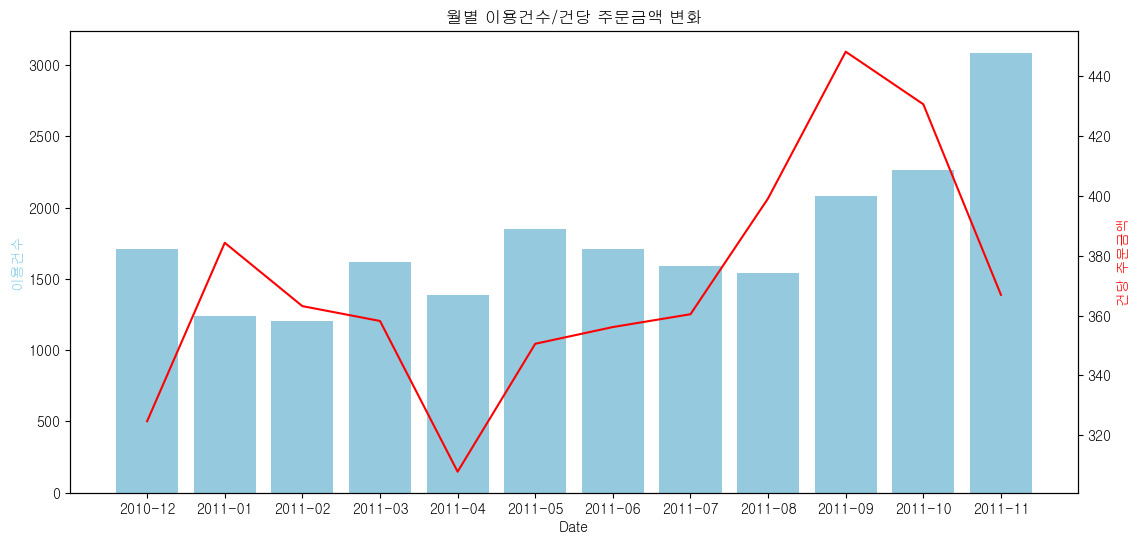

In [139]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 적용
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

plt.figure(figsize=(13, 6))
fig, ax1 = plt.subplots(figsize=(13, 6))

sns.barplot(x='Date', y='이용건수', data=df_date, ax=ax1, color='skyblue')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='이용건당 주문금액', data=df_date, ax=ax2, color='red')
#ax2.set_yticks([])

ax1.set_ylabel('이용건수', color='skyblue')
ax2.set_ylabel('건당 주문금액', color='red')
plt.title('월별 이용건수/건당 주문금액 변화')
plt.show()

<Figure size 1300x600 with 0 Axes>

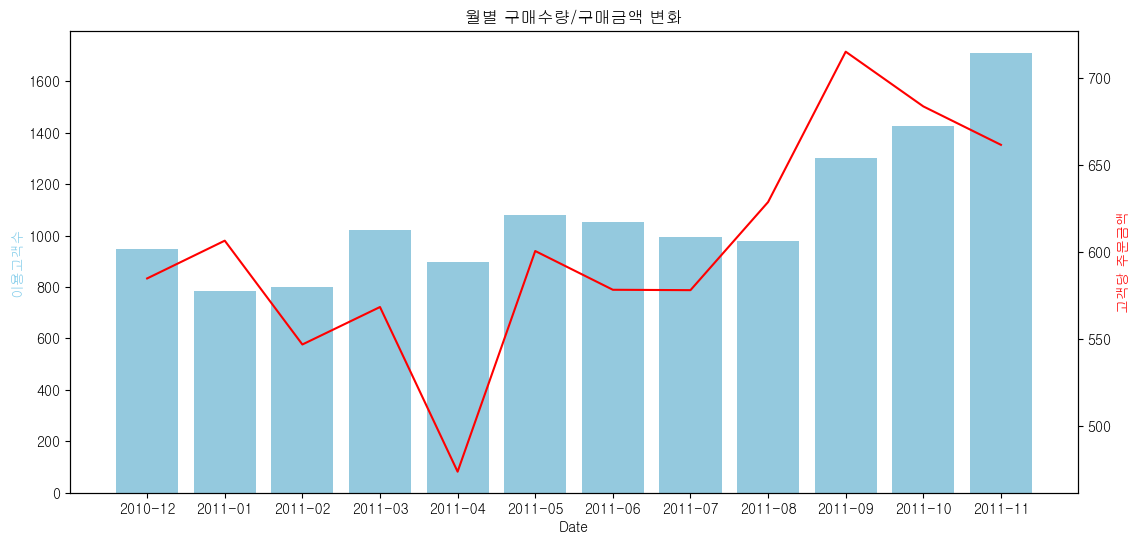

In [140]:
plt.figure(figsize=(13, 6))
fig, ax1 = plt.subplots(figsize=(13, 6))

sns.barplot(x='Date', y='이용고객수', data=df_date, ax=ax1, color='skyblue')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='고객당 주문금액', data=df_date, ax=ax2, color='red')

ax1.set_ylabel('이용고객수', color='skyblue')
ax2.set_ylabel('고객당 주문금액', color='red')
plt.title('월별 구매수량/구매금액 변화')
plt.show()

<Figure size 1300x600 with 0 Axes>

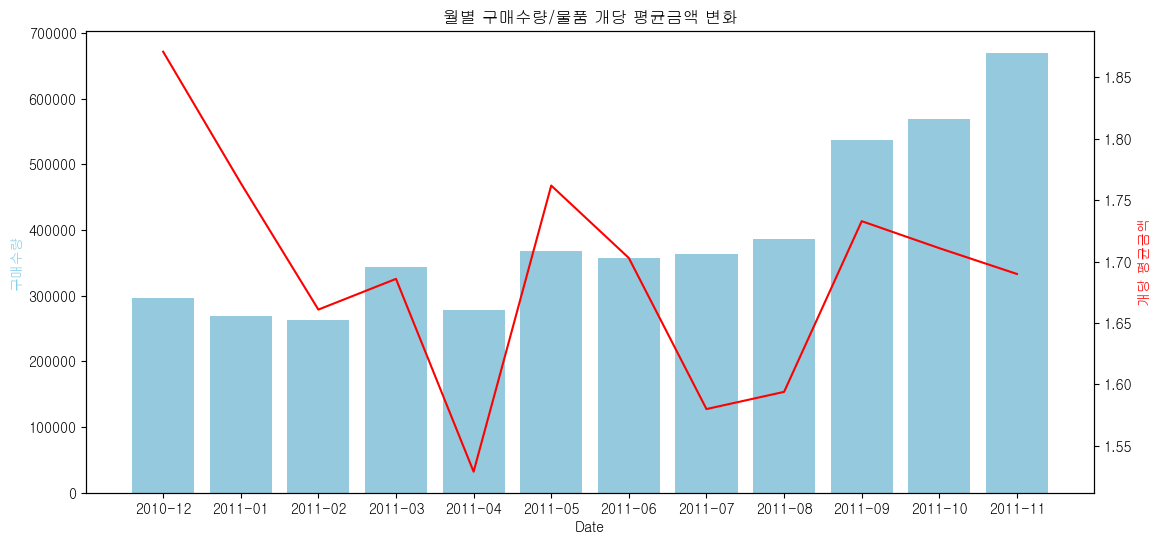

In [141]:
plt.figure(figsize=(13, 6))
fig, ax1 = plt.subplots(figsize=(13, 6))

sns.barplot(x='Date', y='수량', data=df_date, ax=ax1, color='skyblue')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='물품 개당 평균금액', data=df_date, ax=ax2, color='red')

ax1.set_ylabel('구매수량', color='skyblue')
ax2.set_ylabel('개당 평균금액', color='red')
plt.title('월별 구매수량/물품 개당 평균금액 변화')
plt.show()

### 국가별 이용고객수, 거래금액, 구매수량 알아보기
---

In [142]:
df_country = df.groupby('Country').agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','TotalPrice':'sum'}).reset_index()
df_country.columns = ['Country', '이용건수','이용고객수','수량','금액']
df_country.sort_values('이용건수', ascending=False).head(10)

,Country,이용건수,이용고객수,수량,금액
35,United Kingdom,19027,3916,3830949,6469952.924
14,Germany,581,94,113515,213893.510
13,France,437,86,106217,189664.010
10,EIRE,309,3,132384,243308.850
3,Belgium,114,25,22055,39501.530
30,Spain,102,30,26568,54503.150
23,Netherlands,98,9,192170,272933.520
32,Switzerland,71,21,29778,55739.400
0,Australia,69,9,83653,137077.270
26,Portugal,65,19,14478,26257.860


United Kingdom에 기반을 둔 이커머스 사이트인것 같다. 보다 간결한 비교를 위해 Country를 'UK(국내) / 그외(국외)'로 바꾸겠다.  

In [143]:
temp = df_country.sort_values('이용건수', ascending=False).copy()
df_nation = temp.iloc[0:1,:]
df_nation.loc[1] = temp.iloc[1:,:].sum()
df_nation.loc[1,'Country'] = 'Others'
df_nation['이용건당 주문금액'] = round(df_nation.iloc[:,4] / df_nation.iloc[:,1],3)
df_nation['고객당 주문금액'] = round(df_nation.iloc[:,4] / df_nation.iloc[:,2],3)
df_nation['물품 개당 평균금액'] = round(df_nation.iloc[:,4] / df_nation.iloc[:,3],3)
df_nation

C:\Users\dldid\AppData\Local\Temp\ipykernel_19232\4051745194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nation.loc[1] = temp.iloc[1:,:].sum()
C:\Users\dldid\AppData\Local\Temp\ipykernel_19232\4051745194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nation['이용건당 주문금액'] = round(df_nation.iloc[:,4] / df_nation.iloc[:,1],3)
C:\Users\dldid\AppData\Local\Temp\ipykernel_19232\4051745194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Country,이용건수,이용고객수,수량,금액,이용건당 주문금액,고객당 주문금액,물품 개당 평균금액
35,United Kingdom,19027,3916,3830949,6469952.924,340.041,1652.184,1.689
1,Others,2242,423,872103,1487606.510,663.518,3516.800,1.706


In [144]:
round(df_nation.loc[35,'이용고객수'] / df_nation['이용고객수'].sum() * 100, 0)

90.0

국내이용이 활발히 일어나는 사이트이다.(국내 이용 비율 : 90%). 대신 해외 고객은 한 번 구매할 때 주문금액이 더 크다! 

In [145]:
# 추가로 df에 국내/국외 구별 변수를 하나 추가한다. 
df['Nation'] = df.Country
df.Nation = np.where(df.Nation != 'United Kingdom', 'Others' ,'United Kingdom')
df.Nation.value_counts()

Nation
United Kingdom    345801
Others             43367
Name: count, dtype: int64

### 구매물품 분석
---

> 많이 팔리는 물품 알아보기

In [146]:
codelist = df.groupby('StockCode').Quantity.sum().sort_values(ascending=False).head(10).index.tolist()

df[df.StockCode.isin(codelist)].groupby('Description').Quantity.sum().sort_values(ascending=False)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     51852
JUMBO BAG RED RETROSPOT               44026
ASSORTED COLOUR BIRD ORNAMENT         34040
WHITE HANGING HEART T-LIGHT HOLDER    33403
PACK OF 72 RETROSPOT CAKE CASES       33125
MINI PAINT SET VINTAGE                25589
POPCORN HOLDER                        25161
PACK OF 12 LONDON TISSUES             24704
PACK OF 60 PINK PAISLEY CAKE CASES    23946
RABBIT NIGHT LIGHT                    23416
SMALL POPCORN HOLDER                  18208
Name: Quantity, dtype: int64

> 다양한 손님이 찾는 물품 알아보기

In [147]:
codelist = df.groupby('StockCode').CustomerID.nunique().sort_values(ascending=False).head(10).index.tolist()

df[df.StockCode.isin(codelist)].groupby('Description').CustomerID.nunique().sort_values(ascending=False)

Description
REGENCY CAKESTAND 3 TIER              879
WHITE HANGING HEART T-LIGHT HOLDER    852
PARTY BUNTING                         705
ASSORTED COLOUR BIRD ORNAMENT         667
SET OF 3 CAKE TINS PANTRY DESIGN      636
PACK OF 72 RETROSPOT CAKE CASES       629
JUMBO BAG RED RETROSPOT               626
PAPER CHAIN KIT 50'S CHRISTMAS        593
NATURAL SLATE HEART CHALKBOARD        577
BAKING SET 9 PIECE RETROSPOT          573
Name: CustomerID, dtype: int64

> 환불 / 구매취소가 자주 일어나는 물품 알아보기

In [148]:
codelist = df[df.Quantity < 0].groupby('StockCode').Quantity.sum().sort_values().head(10).index.tolist()

df[(df.StockCode.isin(codelist)) & (df.Quantity < 0)].groupby('Description').Quantity.sum().sort_values()

Description
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
Manual                                 -3971
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3132
PINK BLUE FELT CRAFT TRINKET BOX       -2617
WHITE HANGING HEART T-LIGHT HOLDER     -2577
GIN + TONIC DIET METAL SIGN            -2030
HERB MARKER BASIL                      -1527
FELTCRAFT DOLL MOLLY                   -1446
TEA TIME PARTY BUNTING                 -1424
Name: Quantity, dtype: int64

In [149]:
-74494 / df[df.Quantity<0].Quantity.sum()

0.38954981148453965

## **Process 03**
**코호트 분석**
---

참고로 CohortIndex가 1인 경우는 재구매율이 항상 1이므로 분석에 의미가없어 다루지 않겠다. 

In [150]:
df.Date.unique()

array(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11'],
      dtype=object)

In [151]:
cohort = []
customers = []
datelist = df.Date.unique()[:] #10년 12월은 제외

for i, dates in enumerate(datelist):
    cohort.append(df[(df.Date == dates) & (~(df.CustomerID.isin(customers)))].CustomerID.unique().tolist())
    customers.extend(cohort[i])

#위에서 구한 전체 고객수와 맞는지 확인
len(customers)

4331

In [152]:
#각 날짜그룹의 코호트인덱스별 재구매율을 리스트화함
cohort_remain = []

for i in range(len(datelist)):
    remains = []
    for j in range(12-i):
       remains.append(df[(df.Date == datelist[i+j]) & (df.CustomerID.isin(cohort[i]))].CustomerID.nunique() / len(cohort[i]))
    cohort_remain.append(remains)

cohort_remain

[[1.0,
  0.3818565400843882,
  0.33438818565400846,
  0.3871308016877637,
  0.35970464135021096,
  0.39662447257383965,
  0.379746835443038,
  0.35443037974683544,
  0.35443037974683544,
  0.39451476793248946,
  0.37341772151898733,
  0.5],
 [1.0,
  0.23990498812351543,
  0.2826603325415677,
  0.24228028503562946,
  0.32779097387173395,
  0.2992874109263658,
  0.26128266033254155,
  0.25653206650831356,
  0.31116389548693585,
  0.34679334916864607,
  0.3681710213776722],
 [1.0,
  0.24736842105263157,
  0.19210526315789472,
  0.2789473684210526,
  0.26842105263157895,
  0.24736842105263157,
  0.25526315789473686,
  0.28157894736842104,
  0.2578947368421053,
  0.3131578947368421],
 [1.0,
  0.19090909090909092,
  0.2545454545454545,
  0.21818181818181817,
  0.2318181818181818,
  0.17727272727272728,
  0.2636363636363636,
  0.23863636363636365,
  0.28863636363636364],
 [1.0,
  0.22742474916387959,
  0.22073578595317725,
  0.21070234113712374,
  0.20735785953177258,
  0.23745819397993312,
 

### 연도월별 코호트그룹 재구매율 변화 조사

---

In [153]:

cohort_date = pd.DataFrame()
for i in range(12):
    for j in range(12-i):
        cohort_date.loc[i,datelist[i+j]] = cohort_remain[i][j]
cohort_date.index = ["cohort"+datelist[i][2:] for i in range(12)]
cohort_date = cohort_date.T
cohort_date

,cohort10-12,cohort11-01,cohort11-02,cohort11-03,cohort11-04,cohort11-05,cohort11-06,cohort11-07,cohort11-08,cohort11-09,cohort11-10,cohort11-11
2010-12,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01,0.381857,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02,0.334388,0.239905,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03,0.387131,0.282660,0.247368,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04,0.359705,0.242280,0.192105,0.190909,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05,0.396624,0.327791,0.278947,0.254545,0.227425,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2011-06,0.379747,0.299287,0.268421,0.218182,0.220736,0.236559,1.000000,NaN,NaN,NaN,NaN,NaN
2011-07,0.354430,0.261283,0.247368,0.231818,0.210702,0.172043,0.208511,1.000000,NaN,NaN,NaN,NaN
2011-08,0.354430,0.256532,0.255263,0.177273,0.207358,0.172043,0.187234,0.209424,1.000000,NaN,NaN,NaN
2011-09,0.394515,0.311164,0.281579,0.263636,0.237458,0.215054,0.272340,0.204188,0.251497,1.000000,NaN,NaN


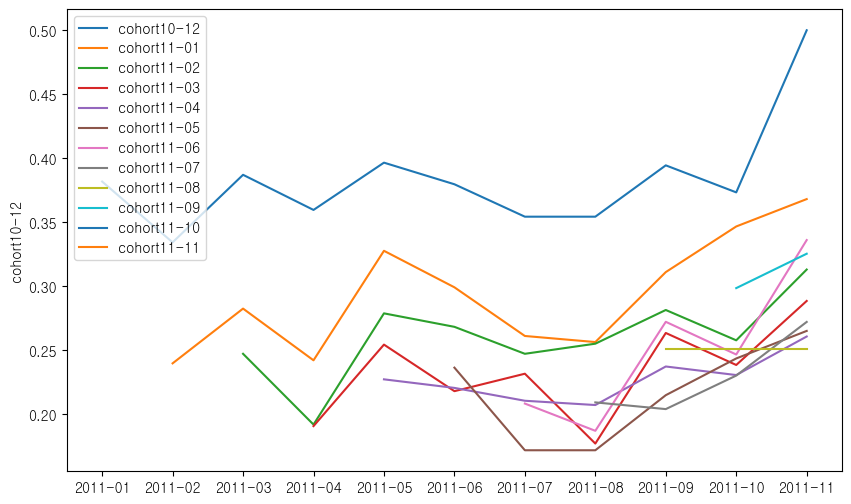

In [154]:
columns = cohort_date.columns[:]
cohort_date = cohort_date.replace(1, np.nan)  #CohortIndex가 1일때는 재구매율이 항상 1이므로 분석의 의미가 없어 이 경우를 분석에서 제외한다. 
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 라인그래프 그리기
for column in columns:
    sns.lineplot(cohort_date[column], label=column)

한눈에 보기 어려우니 대신 boxplot을 이용한다. 

<Axes: >

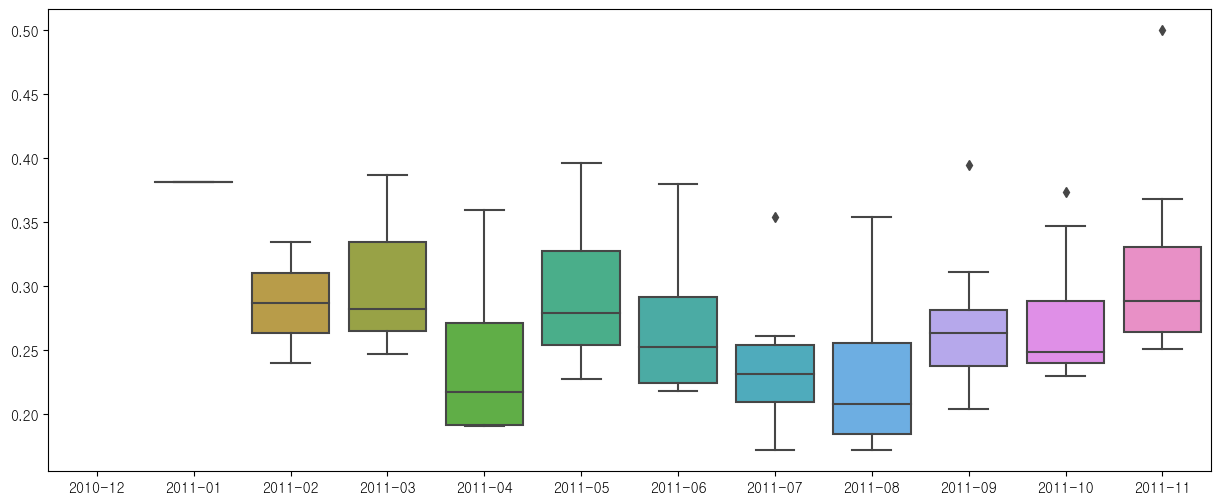

In [155]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cohort_date.T)

2011년 2월, 4월에 전월대비 재구매율이 크게 줄었다. 당월에 어떤 이슈들이 있었는지 조사해볼 필요가 있다. 

그리고 5월, 9월에 전월대비 재구매율이 크게 늘었다. 당월에 어떤 마케팅을 했는지 조사해볼 필요가 있다. 

### CohortIndex별 코호트그룹 재구매율 변화 조사
---

In [156]:

cohort_index = pd.DataFrame()
for i in range(12):
    for j in range(12-i):
        cohort_index.loc[i,"CohortIndex"+str(j+1)] = cohort_remain[i][j]
cohort_index.index = ["cohort"+str(i+1) for i in range(12)]
cohort_index = cohort_index.T
cohort_index

,cohort1,cohort2,cohort3,cohort4,cohort5,cohort6,cohort7,cohort8,cohort9,cohort10,cohort11,cohort12
CohortIndex1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
CohortIndex2,0.381857,0.239905,0.247368,0.190909,0.227425,0.236559,0.208511,0.209424,0.251497,0.298658,0.264205,NaN
CohortIndex3,0.334388,0.282660,0.192105,0.254545,0.220736,0.172043,0.187234,0.204188,0.251497,0.325503,NaN,NaN
CohortIndex4,0.387131,0.242280,0.278947,0.218182,0.210702,0.172043,0.272340,0.230366,0.251497,NaN,NaN,NaN
CohortIndex5,0.359705,0.327791,0.268421,0.231818,0.207358,0.215054,0.246809,0.272251,NaN,NaN,NaN,NaN
CohortIndex6,0.396624,0.299287,0.247368,0.177273,0.237458,0.243728,0.336170,NaN,NaN,NaN,NaN,NaN
CohortIndex7,0.379747,0.261283,0.255263,0.263636,0.230769,0.265233,NaN,NaN,NaN,NaN,NaN,NaN
CohortIndex8,0.354430,0.256532,0.281579,0.238636,0.260870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CohortIndex9,0.354430,0.311164,0.257895,0.288636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CohortIndex10,0.394515,0.346793,0.313158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


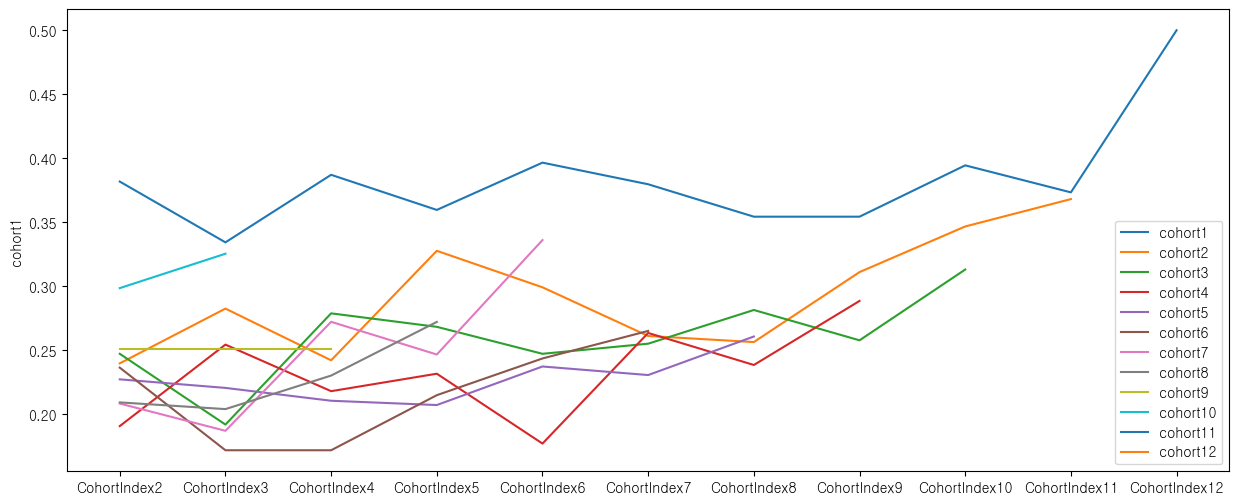

In [169]:
columns = cohort_index.columns[:]
cohort_index = cohort_index.replace(1, np.nan)  #CohortIndex가 1일때는 재구매율이 항상 1이므로 분석의 의미가 없어 이 경우를 분석에서 제외한다. 
# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 라인그래프 그리기
for column in columns:
    sns.lineplot(cohort_index[column], label=column)

한눈에 보기 어려우니 대신 boxplot을 사용해본다

<Axes: >

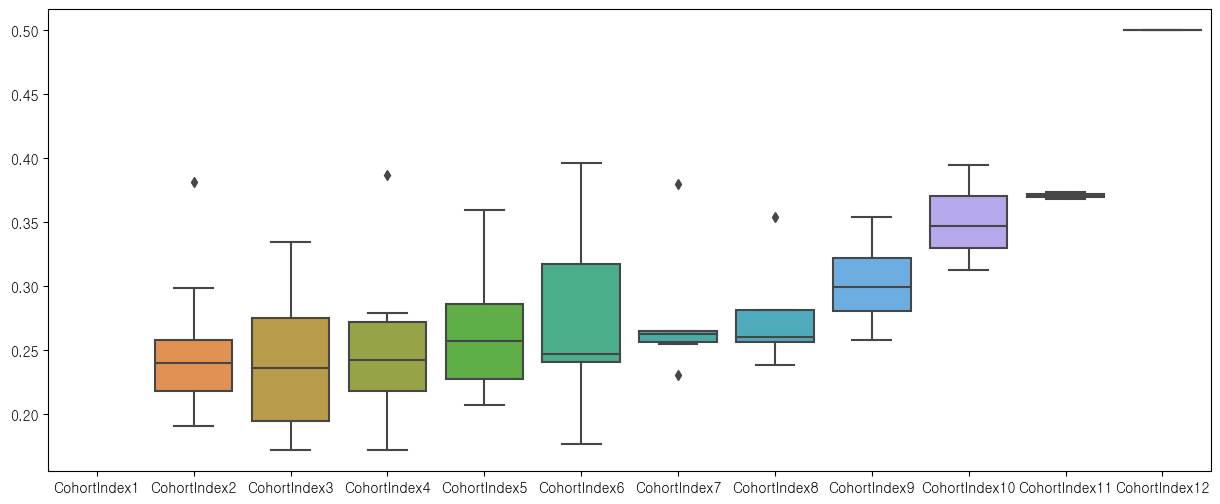

In [168]:
cohort_index2 = cohort_index.T
cohort_index2

plt.figure(figsize=(15, 6))
sns.boxplot(data=cohort_index2)

거시적인 관점으로 봤을때는 CohortIndex가 증가할수록 재구매율이 상승하는 추세임을 알 수 있다. 단, CohortIndex가 상승할수록 표본의 개수가 적어짐에 유의해야한다. 

또한, CohortIndex=3일때 코호트 재구매율이 대체로 감소하는 경향을 보이는 것을 알 수 있다. 라인그래프로 확안해보니 10개 그룹중 7개 그룹이 감소하는 패턴을 보였다. CohortIndex가 3일때 적절한 조치를 취해 고객 이탈을 막아야 할 것이다. index3에서 이탈을 막으면, 이후 index에서는 꾸준한 재구매율 상승 지표를 보여줄 것이다. 

### Heatmap을 이용한 특정 Cohort 그룹의 재구매율 변화 조사
---

<Axes: >

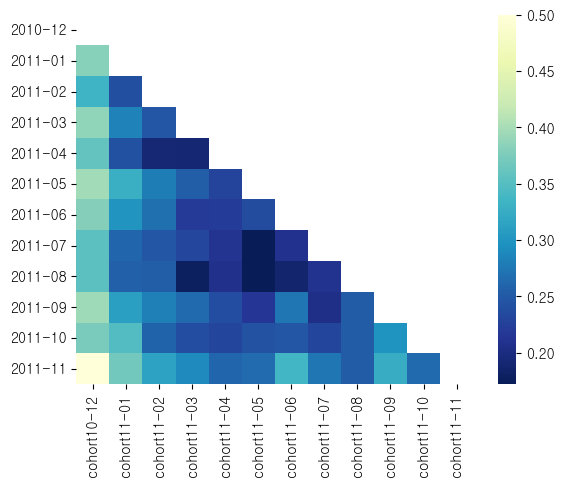

In [159]:
sns.heatmap(cohort_date,cmap="YlGnBu_r")

1. cohort11-02, cohort11-03의 4월 재구매율이 낮다. 
3. cohort11-03, cohort11-05, cohort11-06의 8월 재구매율이 낮다.
4. cohort11-03의 재구매율이 반등하는 곳은 5월, 9월이다. 
5. cohort10-12의 재구매율이 다른 그룹에 비해 전반적으로 높다. 특히 11년 11월에는 재구매율이 50%로 상승한다 

> #### Cohort11-03 분석

In [160]:
df_country = df[df.CustomerID.isin(cohort[3])].groupby('Nation').agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','TotalPrice':'sum'}).reset_index()
df_country.columns = ['Nation', '이용건수','이용고객수','수량','금액']
df_country.loc['계'] = df_country.sum()
df_country.loc['계', 'Nation'] = np.nan
df_country

,Nation,이용건수,이용고객수,수량,금액
0,Others,136,32,35133,65992.06
1,United Kingdom,1670,408,325372,517091.23
계,NaN,1806,440,360505,583083.29


cohort11-03의 재구매율이 저조했다가 반등했던 11년 4월~5월을 조사해본다

In [161]:
# 11년 4월 cohort11-03
df_country = df[(df.Date == '2011-04') & (df.CustomerID.isin(cohort[3]))].groupby('Nation').agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','TotalPrice':'sum'}).reset_index()
df_country.columns = ['Nation', '이용건수','이용고객수','수량','금액']
df_country.loc['계'] = df_country.sum()
df_country.loc['계', 'Nation'] = np.nan
df_country

,Nation,이용건수,이용고객수,수량,금액
0,Others,8,5,871,977.62
1,United Kingdom,115,79,13797,25405.58
계,NaN,123,84,14668,26383.20


In [162]:
# 11년 5월 cohort11-03
df_country = df[(df.Date == '2011-05') & (df.CustomerID.isin(cohort[3]))].groupby('Nation').agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','TotalPrice':'sum'}).reset_index()
df_country.columns = ['Nation', '이용건수','이용고객수','수량','금액']
df_country.loc['계'] = df_country.sum()
df_country.loc['계', 'Nation'] = np.nan
df_country

,Nation,이용건수,이용고객수,수량,금액
0,Others,6,5,1065,1746.08
1,United Kingdom,172,107,29429,51947.87
계,NaN,178,112,30494,53693.95


재구매율은 국내 이용고객에 의해 좌우된다(생각해보면 당연하다). 

> #### cohort10-12 분석

In [165]:
df_country = df[df.CustomerID.isin(cohort[0])].groupby('Nation').agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','TotalPrice':'sum'}).reset_index()
df_country.columns = ['Nation', '이용건수','이용고객수','수량','금액']
df_country.loc['계'] = df_country.sum()
df_country.loc['계', 'Nation'] = np.nan
df_country

,Nation,이용건수,이용고객수,수량,금액
0,Others,1061,77,519107,849370.34
1,United Kingdom,8863,871,1913021,3376838.66
계,NaN,9924,948,2432128,4226209.00


In [166]:
#11년 11월 cohort10-12
df_country = df[(df.Date == '2011-11') & (df.CustomerID.isin(cohort[0]))].groupby('Nation').agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','TotalPrice':'sum'}).reset_index()
df_country.columns = ['Nation', '이용건수','이용고객수','수량','금액']
df_country.loc['계'] = df_country.sum()
df_country.loc['계', 'Nation'] = np.nan
df_country

,Nation,이용건수,이용고객수,수량,금액
0,Others,144,45,56568,96377.08
1,United Kingdom,991,429,238444,414605.15
계,NaN,1135,474,295012,510982.23


해당 코호트그룹의 11월 이용고객수는 처음에 비해 절반으로 되었어도 이용건수는 10분의 1 가량으로 더 큰폭으로 줄었다. 이로서 유추할 수 있는 것은, 재구매고객의 고객당 이용건수는 그렇게 높지 않다는 것이다. 즉, 신규 고객의 고객당 이용건수가 기존고객의 이용건수보다 더 높다. 

이용건수가 높은 고객일수록 구매금액이 더 높은 경향을 보일것이므로, 신규고객을 유치하는 것이 이같은 관점에서 매출의 상승에 도움이 될 것이다. 

## **Lesson Learned**
---

SQL분석 강의에서 배운 객단가, 고객당 주문수량 등 이커머스 판매지표를 직접 확인해볼 수 있는 프로젝트였다. 

그리고 분석을 진행하면서 몇몇 새로운 인사이트를 알아낼 수 있었다. 국내/해외별 판매지표 비교를 통해 해외 고객이 국내고객보다 한번에 많은 구매금액을 지불한다는 것, 기존고객보다 신규고객이 개인당 매출 기여도가 더 높다는 사실이다. 따라서 기존고객의 이탈률 문제 해결도 수익 개선에 도움이 되지만, 해외 및 신규고객을 유치하는 전략을 마련하는것도 하나의 좋은 방법이 될 것이다. 

히트맵 분석을 처음으로 머신러닝-회귀분석 이외의 용도로 사용해봤다. 히트맵의 용도는 오로지 각 변수들의 상관관계를 확인하는 지표로만 사용하는줄 알았는데, 적절한 데이터프레임 테이블을 만들면 히트맵 그래프를 통해 정보를 쉽게 도출할 수 있다는 것을 배웠다. 

코호트 분석을 통해 특정 코호트 그룹이 어떤 시점에서 재구매율이 급증하거나 감소하는 것을 파악할 수 있었다. 비록 그 원인을 이 프로젝트에서는 도출할 수 없었지만, 재구매율이 증가하는 경우를 생각해본다면 '특정 인기상품의 최저가 할인 이벤트', '장기휴면고객 대상 할인쿠폰 증정' 등 여러가지가 있겠다. 그리고 코호트 그룹의 재구매율이 개선되었던 때의 원인들의 사례를 분석한 뒤 차후 마케팅에 적용한다면 재구매율 개선에 도움이 되지 않을까 생각한다. 

---

이 프로젝트에서는 10년 12월 ~ 11년 11월까지의 월을 기준으로 코호트 그룹으로 만들었는데, 10년 12월 그룹의 고객수 및 재구매율이 다른 그룹보다 높았다. 그 이유를 생각해보면, 분석에서는 집계되지않은 10년 12월 이전의 코호트 그룹들이 같이 존재하기 때문일 것이다. 10년 12월뿐만아니라 11년 1월, 2월 역시 집계이전 코호트그룹이 혼합되어있겠지만, 10년 12월이 가장 많은 비율을 차지할 것이다. 조금 더 정확한 분석을 하려고 한다면, 집계이전 그룹이 섞이지 않은 순수한 코호트 그룹을 대상으로 해야 할 것이므로, 10년 12월 및 11년 1월 데이터는 제외하고 코호트 분석을 시행해야 할 것이라고 생각한다. 